## init 

In [1]:
%load_ext autoreload
%autoreload 2

import chess
import ipywidgets as widgets
import chess.pgn
import numpy as np
import io
import sys



if sys.platform=='win32':
    STOCKFISHPATH=r'c:/gitproj/stockfish/stockfish-windows-x86-64-avx2.exe'
else:
    STOCKFISHPATH='/home/jovyan/stockfish/src/stockfish'

engine = chess.engine.SimpleEngine.popen_uci(STOCKFISHPATH)

#this after engine
import nest_asyncio
nest_asyncio.apply()

from ipywidgets import interact, interactive, fixed, interact_manual, SelectMultiple, Combobox, HBox, VBox
import ipywidgets as widgets
import chess.engine
mycalc=None
global mycalc

from calc import Calculator
class GameDispCalc(Calculator):    
    def __init__(self,pgn):
        Calculator.__init__(self, *self.eng_from_engine_path(STOCKFISHPATH))
        self.pgn=pgn
        
    @staticmethod
    def get_game(pgn):
        p=chess.pgn.read_game(io.StringIO(pgn))
        gam=p.game()

        return gam 
    
    def display_game(self):      
        pgn=self.pgn
        def rev(x):
            a.value=(a.value-1)
        def adv(x):
            a.value=(a.value+1)

        from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
        gam = GameDispCalc.get_game(pgn)

        butl=Layout(width='35px',justify_content='center')
        ba=widgets.Button(description='<',layout=butl)
        ba.on_click(rev)
        ne=widgets.Button(description='>',layout=butl)
        ne.on_click(adv)
        mmax=len(list(gam.mainline_moves()))
        a = widgets.IntSlider(value=0, min=0, max=mmax)
        items = [ba,ne, widgets.Button(description='R',layout=butl),a]


        gb2 = widgets.HBox(items,layout=Layout(display='flex',
                flex_flow='row',
                align_items='stretch',
                width='100%'))
        def f2(a):
            #update game progress
            cur=gam
            for k in range(a):
                cur=cur.next()
            display( widgets.HTML(str(cur.board()._repr_svg_())))


        def f3(a):
            #update stability calc
            cur=gam
            for k in range(a):
                cur=cur.next()

            iswhite= (a%2 ==0)

            curb=cur.board()
            #display(list(curb.generate_legal_moves()))

            self.print_stats(curb,iswhite,full=(a>5))

        return VBox([gb2,widgets.interactive_output(f2,{'a':a}),widgets.interactive_output(f3,{'a':a})],layout=Layout(
            display='flex',
            flex_flow='column',
            align_items='stretch',
            width='90%'
        ) )
def display_game(pgn):
    return GameDispCalc(pgn).display_game()

def display_board(fen,iswhite=None,simp=False):
    mycalc=Calculator.from_engine_path(STOCKFISHPATH)
    b=chess.Board(fen)
    if iswhite is None:
        iswhite= b.turn
    display( widgets.HTML(str(b._repr_svg_())))
    if not simp:
        mycalc.print_stats(b,iswhite)
    
    
fen='r2Rr1k1/pp3pp1/2p2bbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R b - - 0 17'
#mycalc=Calculator(engine,None)
b=chess.Board(fen)


In [2]:
display_board('r2r2k1/pp3pp1/2p2bbp/4n3/4NBP1/2Q1P2P/PPP2P2/1K3B1R b - - 0 18)

SyntaxError: unterminated string literal (detected at line 1) (717828725.py, line 1)

In [7]:
display_board(fen)

HTML(value='<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 39…

score: -3.36
stability factor: 37.60%
num of reasonable moves: 7
max(score) of reasonable: 1.22
min(score)  of reasonable: -1.56
faraction method: True
moves by depth: {1: {('Raxd8', -403, 32), ('Rexd8', -518, -83)}, 2: {('Raxd8;Be2', -388, 15), ('Raxd8;Bc4', -356, 47), ('Raxd8;Bg2', -335, 68), ('Raxd8;a4', -318, 85), ('Raxd8;a3', -316, 87)}, 3: {('Raxd8;Bc4;a6', -414, -58), ('Raxd8;Bg2;c5', -420, -85), ('Raxd8;Bc4;b6', -399, -43), ('Raxd8;a3;b5', -389, -73), ('Raxd8;a3;a5', -409, -93), ('Raxd8;a3;Rd1+', -316, 0), ('Raxd8;Bc4;c5', -431, -75), ('Raxd8;Be2;h5', -488, -100), ('Raxd8;Bc4;Bh7', -416, -60), ('Raxd8;Bg2;h5', -417, -82), ('Raxd8;Bg2;b5', -411, -76), ('Raxd8;Bg2;a5', -422, -87), ('Raxd8;Bc4;a5', -399, -43), ('Raxd8;Bc4;h5', -410, -54)}, 4: {('Raxd8;Bg2;c5;g5', -325, 62), ('Raxd8;Bg2;b5;Qc5', -320, 97), ('Raxd8;a3;Rd1+;Ka2', -214, 0), ('Raxd8;Bg2;h5;g5', -492, 64), ('Raxd8;a3;b5;Qc5', -325, 39), ('Raxd8;a3;a5;Qc5', -321, 99), ('Raxd8;Bg2;b5;g5', -356, 61)}}


In [3]:
ff='3rr1k1/pp3pp1/2p2bbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R w - - 0 18'

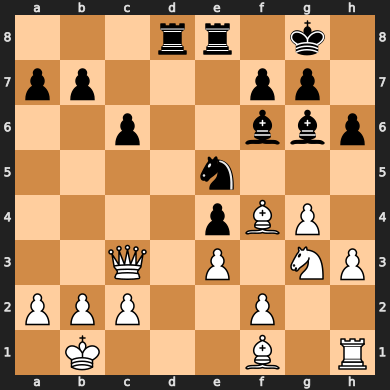

In [4]:
chess.Board(ff)

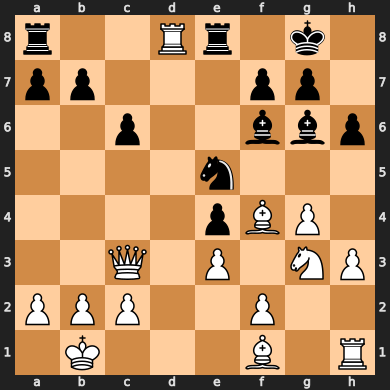

In [12]:
b

In [10]:
deprel=1/3
f= 2** (-10* deprel)
l=chess.engine.Limit(depth=3, time=0.001 * f * 1000  ,nodes=800 * f * 1000)
engine.analyse(b,l)

{'string': 'NNUE evaluation using nn-5af11540bbfe.nnue enabled',
 'depth': 3,
 'seldepth': 2,
 'multipv': 1,
 'score': PovScore(Cp(-435), BLACK),
 'nodes': 94,
 'nps': 94000,
 'hashfull': 0,
 'tbhits': 0,
 'time': 0.001,
 'pv': [Move.from_uci('a8d8')]}

In [11]:
deprel=1/3
f= 2** (-10* deprel)
l=chess.engine.Limit(depth=3, time=0.001 * f * 1000  ,nodes=800 * f * 1000)
engine.analyse(chess.Board(ff),l)

{'string': 'NNUE evaluation using nn-5af11540bbfe.nnue enabled',
 'depth': 3,
 'seldepth': 2,
 'multipv': 1,
 'score': PovScore(Cp(+403), WHITE),
 'nodes': 115,
 'nps': 115000,
 'hashfull': 0,
 'tbhits': 0,
 'time': 0.001,
 'pv': [Move.from_uci('f1e2')]}

In [11]:
uci.from_fen(*fen.split(" "))

[autoreload of calc failed: Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 3

NameError: name 'uci' is not defined

In [9]:
fen =='r3R1k1/pp3pp1/2p2bbp/8/4pBP1/2Q1P1NP/PPP2P2/1K2nB1R w - - 1 17'

False

[autoreload of calc failed: Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\IPython\extensions\autoreload.py", line 3

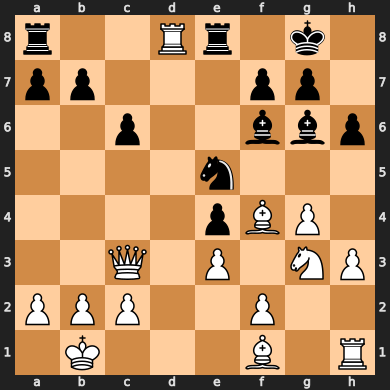

In [14]:
b

In [13]:
display_board ('r3R1k1/pp3pp1/2p2bbp/8/4pBP1/2Q1P1NP/PnP2P2/1K3B1R w - - 0 19',simp=True)

HTML(value='<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 39…

In [7]:
display_board('r2R2k1/pp2rpp1/2p2bbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 18',simp=True)

HTML(value='<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 39…

In [6]:
display_board(fen)

HTML(value='<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 39…

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp 35 nodes 43 nps 43000 hashfull 0 tbhits 0 time 1 pv e4d3', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp 57 nodes 85 nps 85000 hashfull 0 tbhits 0 time 1 pv e4d3', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp 88 nodes 145 nps 145000 hashfull 0 tbhits 0 time 1 pv e4d3', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp 35 nodes 225 nps 225000 hashfull 0 tbhits 0 time 1 pv e4d3 d8e8 a8e8 g3f5', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp 35 nodes 301 nps 301000 hashfull 0 tbhits 0 time 1 pv e4d3 d8e

['Bh7', 'Qd3'] -35 -387


Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp 35 nodes 40 nps 40000 hashfull 0 tbhits 0 time 1 pv e4d3', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp 35 nodes 74 nps 74000 hashfull 0 tbhits 0 time 1 pv e4d3 d8e8 a8e8', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp 35 nodes 108 nps 108000 hashfull 0 tbhits 0 time 1 pv e4d3 d8e8 a8e8', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp 35 nodes 147 nps 147000 hashfull 0 tbhits 0 time 1 pv e4d3 d8e8 a8e8 g3f5', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp 35 nodes 187 nps 187000 hashfull 0 tbhits 

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -453 nodes 37 nps 37000 hashfull 1 tbhits 0 time 1 pv a8d8 f4e5 f6e5', position at root: r2Rrk2/pp3ppb/2p2b1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -521 nodes 103 nps 103000 hashfull 1 tbhits 0 time 1 pv a8d8 f1e2', position at root: r2Rrk2/pp3ppb/2p2b1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp -521 nodes 132 nps 66000 hashfull 1 tbhits 0 time 2 pv a8d8 f1e2', position at root: r2Rrk2/pp3ppb/2p2b1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 3 multipv 1 score cp -521 nodes 162 nps 81000 hashfull 1 tbhits 0 time 2 pv a8d8 f1e2', position at root: r2Rrk2/pp3ppb/2p2b1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 3 multipv 1 score cp -504 nodes 201 nps 100500 hashfull 1 tbhits 0 ti

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -400 nodes 32 nps 16000 hashfull 2 tbhits 0 time 2 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -400 nodes 62 nps 31000 hashfull 2 tbhits 0 time 2 pv a8d8 b1c1', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 4 multipv 1 score cp -400 nodes 101 nps 50500 hashfull 2 tbhits 0 time 2 pv a8d8 b1c1 e5d3 c2d3', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -400 nodes 140 nps 70000 hashfull 2 tbhits 0 time 2 pv a8d8 b1c1 e5d3 c2d3 e4d3', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -400 nodes 180 nps 90000 hashfu

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -431 nodes 31 nps 15500 hashfull 0 tbhits 0 time 2 pv a8d8', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -431 nodes 62 nps 31000 hashfull 0 tbhits 0 time 2 pv a8d8 b1c1', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 4 multipv 1 score cp -431 nodes 98 nps 49000 hashfull 0 tbhits 0 time 2 pv a8d8 b1c1 f6e7 a3a7', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -431 nodes 134 nps 67000 hashfull 0 tbhits 0 time 2 pv a8d8 b1c1 f6e7 a3a7', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/Q3P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -431 nodes 175 nps 87500 hashfull 0 t

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -76 nodes 40 nps 40000 hashfull 2 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/3QpBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -76 nodes 68 nps 68000 hashfull 2 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/3QpBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -76 nodes 96 nps 96000 hashfull 2 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/3QpBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 2 multipv 1 score cp -65 nodes 126 nps 126000 hashfull 2 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/3QpBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 3 multipv 1 score cp -65 nodes 158 nps 158000 hashfull 2 tbhits 0 time 1 pv a8d8 f4e5 f6e5', pos

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -34 nodes 34 nps 34000 hashfull 1 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/3QpBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -34 nodes 65 nps 65000 hashfull 1 tbhits 0 time 1 pv a8d8 g3h5', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/3QpBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp -34 nodes 99 nps 99000 hashfull 1 tbhits 0 time 1 pv a8d8 g3h5 e5f3', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/3QpBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -34 nodes 134 nps 134000 hashfull 1 tbhits 0 time 1 pv a8d8 g3h5 e5f3 h5f6 g7f6', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/3QpBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -34 nodes 169 nps 169000 hashfull 1 tbhi

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -279 nodes 33 nps 33000 hashfull 3 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/Q3n3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -279 nodes 60 nps 60000 hashfull 3 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/Q3n3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -279 nodes 87 nps 87000 hashfull 3 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/Q3n3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 3 multipv 1 score cp -460 nodes 209 nps 209000 hashfull 3 tbhits 0 time 1 pv a8d8 f1e2', position at root: r2R2k1/pp2rppb/2p2b1p/Q3n3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 3 multipv 1 score cp -442 nodes 239 nps 239000 hashfull 3 tbhits 0 time 1 pv a8d8 f1e2 

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -434 nodes 31 nps 31000 hashfull 3 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3ppb/2p1rb1p/Q3n3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -434 nodes 58 nps 58000 hashfull 3 tbhits 0 time 1 pv a8d8 f1e2', position at root: r2R2k1/pp3ppb/2p1rb1p/Q3n3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 4 multipv 1 score cp -434 nodes 93 nps 93000 hashfull 3 tbhits 0 time 1 pv a8d8 f1e2 e5d3 g3h5', position at root: r2R2k1/pp3ppb/2p1rb1p/Q3n3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -434 nodes 128 nps 128000 hashfull 3 tbhits 0 time 1 pv a8d8 f1e2 e5d3 g3h5', position at root: r2R2k1/pp3ppb/2p1rb1p/Q3n3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -434 nodes 167 nps 167000 hashfull 3

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -564 nodes 33 nps 16500 hashfull 3 tbhits 0 time 2 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/2Q1P1NP/PPP1BP2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -564 nodes 61 nps 30500 hashfull 3 tbhits 0 time 2 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/2Q1P1NP/PPP1BP2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -564 nodes 89 nps 44500 hashfull 3 tbhits 0 time 2 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/2Q1P1NP/PPP1BP2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 2 multipv 1 score cp -456 nodes 121 nps 60500 hashfull 3 tbhits 0 time 2 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/2Q1P1NP/PPP1BP2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 3 multipv 1 score cp -436 nodes 155 nps 77500 hashfull 3 tbhits 0 time 2 pv a8d8 h1d1', posit

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -552 nodes 33 nps 16500 hashfull 4 tbhits 0 time 2 pv e8d8', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/2Q1P1NP/PPP1BP2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -552 nodes 62 nps 31000 hashfull 4 tbhits 0 time 2 pv e8d8 g3h5', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/2Q1P1NP/PPP1BP2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp -552 nodes 100 nps 50000 hashfull 4 tbhits 0 time 2 pv e8d8 g3h5 e5d3', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/2Q1P1NP/PPP1BP2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -552 nodes 136 nps 68000 hashfull 4 tbhits 0 time 2 pv e8d8 g3h5 e5d3 h5f6 g7f6', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/2Q1P1NP/PPP1BP2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -552 nodes 172 nps 86000 hashfull 4 

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -476 nodes 34 nps 34000 hashfull 6 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/B1p2b1p/4n3/4pBP1/2Q1P1NP/PPP2P2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -476 nodes 61 nps 61000 hashfull 6 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/B1p2b1p/4n3/4pBP1/2Q1P1NP/PPP2P2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -476 nodes 88 nps 88000 hashfull 6 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/B1p2b1p/4n3/4pBP1/2Q1P1NP/PPP2P2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 2 multipv 1 score cp -448 nodes 115 nps 115000 hashfull 6 tbhits 0 time 1 pv a8d8 a6e2', position at root: r2R2k1/pp2rppb/B1p2b1p/4n3/4pBP1/2Q1P1NP/PPP2P2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 4 multipv 1 score cp -454 nodes 144 nps 144000 hashfull 6 tbhits 0 time 1 pv a8d8 a6e2 

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -389 nodes 33 nps 33000 hashfull 2 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3ppb/B1p1rb1p/4n3/4pBP1/2Q1P1NP/PPP2P2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -389 nodes 63 nps 63000 hashfull 2 tbhits 0 time 1 pv a8d8 g3h5', position at root: r2R2k1/pp3ppb/B1p1rb1p/4n3/4pBP1/2Q1P1NP/PPP2P2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp -389 nodes 101 nps 101000 hashfull 2 tbhits 0 time 1 pv a8d8 g3h5 b7a6', position at root: r2R2k1/pp3ppb/B1p1rb1p/4n3/4pBP1/2Q1P1NP/PPP2P2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -389 nodes 139 nps 139000 hashfull 2 tbhits 0 time 1 pv a8d8 g3h5 b7a6 h5f6 g7f6', position at root: r2R2k1/pp3ppb/B1p1rb1p/4n3/4pBP1/2Q1P1NP/PPP2P2/1K5R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -389 nodes 178 nps 178000 hashfull

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -262 nodes 34 nps 34000 hashfull 4 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/2Q1P1NP/PPP2P1R/1K3B2 w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -262 nodes 62 nps 62000 hashfull 4 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/2Q1P1NP/PPP2P1R/1K3B2 w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -262 nodes 90 nps 90000 hashfull 4 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/2Q1P1NP/PPP2P1R/1K3B2 w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 2 multipv 1 score cp -245 nodes 139 nps 139000 hashfull 4 tbhits 0 time 1 pv e8d8', position at root: r2R2k1/pp2rppb/2p2b1p/4n3/4pBP1/2Q1P1NP/PPP2P1R/1K3B2 w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 4 multipv 1 score cp -94 nodes 228 nps 228000 hashfull 4 tbhits 0 time 1 pv a8d8', posit

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -134 nodes 34 nps 34000 hashfull 4 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/2Q1P1NP/PPP2P1R/1K3B2 w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -134 nodes 64 nps 64000 hashfull 4 tbhits 0 time 1 pv a8d8 f1e2', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/2Q1P1NP/PPP2P1R/1K3B2 w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 4 multipv 1 score cp -134 nodes 99 nps 99000 hashfull 4 tbhits 0 time 1 pv a8d8 f1e2 e5f3 c3a5', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/2Q1P1NP/PPP2P1R/1K3B2 w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 5 multipv 1 score cp -134 nodes 137 nps 137000 hashfull 4 tbhits 0 time 1 pv a8d8 f1e2 e5f3 c3a5 f3h2', position at root: r2R2k1/pp3ppb/2p1rb1p/4n3/4pBP1/2Q1P1NP/PPP2P1R/1K3B2 w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 6 multipv 1 score cp -134 nodes 179 nps 179000 h

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -779 nodes 36 nps 36000 hashfull 8 tbhits 0 time 1 pv a8d8 g5d8 e8d8 c3e5', position at root: r2R2k1/pp2rpp1/2p3bp/4n1B1/4p1P1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -779 nodes 64 nps 64000 hashfull 8 tbhits 0 time 1 pv a8d8 g5d8 e8d8', position at root: r2R2k1/pp2rpp1/2p3bp/4n1B1/4p1P1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp -779 nodes 92 nps 92000 hashfull 8 tbhits 0 time 1 pv a8d8 g5d8 e8d8 c3e5', position at root: r2R2k1/pp2rpp1/2p3bp/4n1B1/4p1P1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -619 nodes 141 nps 141000 hashfull 8 tbhits 0 time 1 pv a8d8 g5d8 e8d8', position at root: r2R2k1/pp2rpp1/2p3bp/4n1B1/4p1P1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -630 nodes 17

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -521 nodes 38 nps 38000 hashfull 8 tbhits 0 time 1 pv a8d8', position at root: r2Rrk2/pp3pp1/2p3bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -521 nodes 68 nps 68000 hashfull 8 tbhits 0 time 1 pv a8d8', position at root: r2Rrk2/pp3pp1/2p3bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -521 nodes 98 nps 98000 hashfull 8 tbhits 0 time 1 pv a8d8', position at root: r2Rrk2/pp3pp1/2p3bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 2 multipv 1 score cp -382 nodes 136 nps 136000 hashfull 8 tbhits 0 time 1 pv a8d8', position at root: r2Rrk2/pp3pp1/2p3bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -344 nodes 233 nps 233000 hashfull 8 tbhits 0 time 1 pv a8d8 f1e2 g

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -484 nodes 37 nps 37000 hashfull 8 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/2p3bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -484 nodes 69 nps 69000 hashfull 8 tbhits 0 time 1 pv a8d8 f1e2', position at root: r2R2k1/pp2rpp1/2p3bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 4 multipv 1 score cp -484 nodes 108 nps 108000 hashfull 8 tbhits 0 time 1 pv a8d8 f1e2 g5f6 a2a3', position at root: r2R2k1/pp2rpp1/2p3bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 5 multipv 1 score cp -484 nodes 154 nps 154000 hashfull 8 tbhits 0 time 1 pv a8d8 f1e2 g5f6 a2a3 e5f3', position at root: r2R2k1/pp2rpp1/2p3bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 6 multipv 1 score cp -484 nodes 198 nps 19

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -463 nodes 37 nps 37000 hashfull 10 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3pp1/2p1r1bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -463 nodes 70 nps 70000 hashfull 10 tbhits 0 time 1 pv a8d8 f1e2', position at root: r2R2k1/pp3pp1/2p1r1bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 4 multipv 1 score cp -463 nodes 105 nps 105000 hashfull 10 tbhits 0 time 1 pv a8d8 f1e2 g5f6 a2a3', position at root: r2R2k1/pp3pp1/2p1r1bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 5 multipv 1 score cp -463 nodes 142 nps 142000 hashfull 10 tbhits 0 time 1 pv a8d8 f1e2 g5f6 a2a3 e5f3', position at root: r2R2k1/pp3pp1/2p1r1bp/4n1b1/1Q2pBP1/4P1NP/PPP2P2/1K3B1R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 6 multipv 1 score cp -463 nodes 18

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -614 nodes 36 nps 36000 hashfull 7 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/2p3bp/4n1b1/4pBP1/2Q1P1NP/PPP2PB1/1K5R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -614 nodes 66 nps 66000 hashfull 7 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/2p3bp/4n1b1/4pBP1/2Q1P1NP/PPP2PB1/1K5R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -614 nodes 96 nps 96000 hashfull 7 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/2p3bp/4n1b1/4pBP1/2Q1P1NP/PPP2PB1/1K5R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 2 multipv 1 score cp -565 nodes 126 nps 126000 hashfull 7 tbhits 0 time 1 pv a8d8 f4e5', position at root: r2R2k1/pp2rpp1/2p3bp/4n1b1/4pBP1/2Q1P1NP/PPP2PB1/1K5R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 3 multipv 1 score cp -601 nodes 162 nps 162000 hashfull 7 tbhits 0 time 1 pv a8d8 f

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -628 nodes 36 nps 36000 hashfull 8 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3pp1/2p1r1bp/4n1b1/4pBP1/2Q1P1NP/PPP2PB1/1K5R w - - 3 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -628 nodes 66 nps 66000 hashfull 8 tbhits 0 time 1 pv a8d8 f4e5', position at root: r2R2k1/pp3pp1/2p1r1bp/4n1b1/4pBP1/2Q1P1NP/PPP2PB1/1K5R w - - 3 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp -628 nodes 98 nps 98000 hashfull 8 tbhits 0 time 1 pv a8d8 f4e5 g5f6', position at root: r2R2k1/pp3pp1/2p1r1bp/4n1b1/4pBP1/2Q1P1NP/PPP2PB1/1K5R w - - 3 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -628 nodes 131 nps 131000 hashfull 8 tbhits 0 time 1 pv a8d8 f4e5 g5f6 e5f6', position at root: r2R2k1/pp3pp1/2p1r1bp/4n1b1/4pBP1/2Q1P1NP/PPP2PB1/1K5R w - - 3 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -628 nodes 165 nps 165000 hashful

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp 105 nodes 41 nps 20500 hashfull 10 tbhits 0 time 2 pv e4d3', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 2 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp 105 nodes 76 nps 38000 hashfull 10 tbhits 0 time 2 pv e4d3 d8a8', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 2 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp 105 nodes 111 nps 55500 hashfull 10 tbhits 0 time 2 pv e4d3 d8a8 d3c2 b1c1', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 2 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp 105 nodes 151 nps 75500 hashfull 10 tbhits 0 time 2 pv e4d3 d8a8 d3c2 b1c1', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 2 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp 105 nodes 191 nps 95500 hashfull 10 

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp 22 nodes 37 nps 37000 hashfull 6 tbhits 0 time 1 pv e4d3', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 2 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp 22 nodes 72 nps 72000 hashfull 6 tbhits 0 time 1 pv e4d3 d8a8', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 2 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp 22 nodes 110 nps 110000 hashfull 6 tbhits 0 time 1 pv e4d3 d8a8 d3c2 b1c1', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 2 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp 22 nodes 151 nps 151000 hashfull 6 tbhits 0 time 1 pv e4d3 d8a8 d3c2 b1c1', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/4pBP1/3QP1NP/PPP2P2/1K3B1R w - - 2 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp 22 nodes 195 nps 195000 hashfull 6 tbhits 

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -492 nodes 34 nps 34000 hashfull 12 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1Q3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -492 nodes 56 nps 56000 hashfull 12 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1Q3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -492 nodes 78 nps 78000 hashfull 12 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1Q3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 4 seldepth 2 multipv 1 score cp -206 nodes 106 nps 106000 hashfull 12 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1Q3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 5 seldepth 3 multipv 1 score cp 30 nodes 140 nps 140000 hashfull 12 tbhits 0 time 1 pv a8d8', position 

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -387 nodes 34 nps 34000 hashfull 11 tbhits 0 time 1 pv e8d8', position at root: r2R2k1/pp3pp1/4rbbp/2p1Q3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -387 nodes 58 nps 58000 hashfull 11 tbhits 0 time 1 pv e8d8 b1c1', position at root: r2R2k1/pp3pp1/4rbbp/2p1Q3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp -387 nodes 83 nps 41500 hashfull 11 tbhits 0 time 2 pv e8d8 b1c1 f6e5', position at root: r2R2k1/pp3pp1/4rbbp/2p1Q3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -387 nodes 110 nps 55000 hashfull 11 tbhits 0 time 2 pv e8d8 b1c1 f6e5 f4e5', position at root: r2R2k1/pp3pp1/4rbbp/2p1Q3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 1 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -387 nodes 139 nps 69500 hashfull 11 tbhit

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -446 nodes 35 nps 17500 hashfull 10 tbhits 0 time 2 pv e8d8', position at root: r2R2k1/pp3pp1/5bbp/2p1r3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 0 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -446 nodes 59 nps 29500 hashfull 10 tbhits 0 time 2 pv e8d8 b1c1', position at root: r2R2k1/pp3pp1/5bbp/2p1r3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 0 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp -446 nodes 84 nps 42000 hashfull 10 tbhits 0 time 2 pv e8d8 b1c1 f6e5', position at root: r2R2k1/pp3pp1/5bbp/2p1r3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 0 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -446 nodes 110 nps 55000 hashfull 10 tbhits 0 time 2 pv e8d8 b1c1 f6e5 f4e5', position at root: r2R2k1/pp3pp1/5bbp/2p1r3/4pBP1/4P1NP/PPP2P2/1K3B1R w - - 0 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -446 nodes 137 nps 68500 hashfull 10 tbhits 0 

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -409 nodes 36 nps 36000 hashfull 11 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/4pBP1/2Q1P1NP/PPP2P2/K4B1R w - - 2 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -409 nodes 65 nps 65000 hashfull 11 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/4pBP1/2Q1P1NP/PPP2P2/K4B1R w - - 2 19
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -409 nodes 94 nps 94000 hashfull 11 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/4pBP1/2Q1P1NP/PPP2P2/K4B1R w - - 2 19
Exception parsing pv from info: 'depth 4 seldepth 2 multipv 1 score cp -302 nodes 126 nps 126000 hashfull 11 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/4pBP1/2Q1P1NP/PPP2P2/K4B1R w - - 2 19
Exception parsing pv from info: 'depth 5 seldepth 3 multipv 1 score cp -362 nodes 200 nps 200000 hashfull 11 tbhits 0 time 1 pv a8d8 f1e2 

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -313 nodes 32 nps 32000 hashfull 10 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/4pBP1/2Q1P1NP/PPP2P2/K4B1R w - - 2 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -313 nodes 62 nps 62000 hashfull 10 tbhits 0 time 1 pv a8d8 c3e1', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/4pBP1/2Q1P1NP/PPP2P2/K4B1R w - - 2 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp -313 nodes 94 nps 94000 hashfull 10 tbhits 0 time 1 pv a8d8 c3e1 e5f3', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/4pBP1/2Q1P1NP/PPP2P2/K4B1R w - - 2 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -313 nodes 128 nps 128000 hashfull 10 tbhits 0 time 1 pv a8d8 c3e1 e5f3 e1c1', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/4pBP1/2Q1P1NP/PPP2P2/K4B1R w - - 2 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -313 nodes 165 nps 165000 hashfull 10

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -487 nodes 33 nps 33000 hashfull 8 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/2B1pBP1/2Q1P1NP/PPP2P2/1K5R w - - 2 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -487 nodes 60 nps 60000 hashfull 8 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/2B1pBP1/2Q1P1NP/PPP2P2/1K5R w - - 2 19
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -487 nodes 87 nps 87000 hashfull 8 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/2B1pBP1/2Q1P1NP/PPP2P2/1K5R w - - 2 19
Exception parsing pv from info: 'depth 4 seldepth 2 multipv 1 score cp -431 nodes 118 nps 118000 hashfull 8 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/5bbp/2p1n3/2B1pBP1/2Q1P1NP/PPP2P2/1K5R w - - 2 19
Exception parsing pv from info: 'depth 5 seldepth 3 multipv 1 score cp -431 nodes 168 nps 168000 hashfull 8 tbhits 0 time 1 pv a8d8 f4e5 f

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -417 nodes 33 nps 33000 hashfull 9 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/2B1pBP1/2Q1P1NP/PPP2P2/1K5R w - - 2 19
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -417 nodes 62 nps 62000 hashfull 9 tbhits 0 time 1 pv a8d8 f4e5', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/2B1pBP1/2Q1P1NP/PPP2P2/1K5R w - - 2 19
Exception parsing pv from info: 'depth 3 seldepth 3 multipv 1 score cp -417 nodes 93 nps 93000 hashfull 9 tbhits 0 time 1 pv a8d8 f4e5 f6e5', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/2B1pBP1/2Q1P1NP/PPP2P2/1K5R w - - 2 19
Exception parsing pv from info: 'depth 4 seldepth 4 multipv 1 score cp -417 nodes 126 nps 126000 hashfull 9 tbhits 0 time 1 pv a8d8 f4e5 f6e5 c3e1', position at root: r2R2k1/pp3pp1/4rbbp/2p1n3/2B1pBP1/2Q1P1NP/PPP2P2/1K5R w - - 2 19
Exception parsing pv from info: 'depth 5 seldepth 5 multipv 1 score cp -417 nodes 163 nps 163000 hashfull 9 

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -435 nodes 144 nps 144000 hashfull 0 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/2p2bbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 18
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -435 nodes 262 nps 262000 hashfull 0 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/2p2bbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 18
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -435 nodes 430 nps 430000 hashfull 0 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp2rpp1/2p2bbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 18
UciAnalysisCommand failed after returning preliminary result (<Future finished result=<chess.engine...002A04D12B850>>)
protocol: <UciProtocol (pid=66788)>
transport: <_WindowsSubprocessTransport pid=66788 running stdin=<_ProactorWritePipeTransport fd=1952 read=<_OverlappedFuture pending overlapped=<pending, 0x2a04c96f370> cb=[_ProactorWritePipeTra

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

Exception parsing pv from info: 'depth 1 seldepth 1 multipv 1 score cp -435 nodes 125 nps 125000 hashfull 0 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3pp1/2p1rbbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 18
Exception parsing pv from info: 'depth 2 seldepth 2 multipv 1 score cp -435 nodes 237 nps 237000 hashfull 0 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3pp1/2p1rbbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 18
Exception parsing pv from info: 'depth 3 seldepth 2 multipv 1 score cp -435 nodes 378 nps 378000 hashfull 0 tbhits 0 time 1 pv a8d8', position at root: r2R2k1/pp3pp1/2p1rbbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R w - - 1 18
UciAnalysisCommand failed after returning preliminary result (<Future finished result=<chess.engine...002A04D11A6B0>>)
protocol: <UciProtocol (pid=66788)>
transport: <_WindowsSubprocessTransport pid=66788 running stdin=<_ProactorWritePipeTransport fd=1952 read=<_OverlappedFuture pending overlapped=<pending, 0x2a04c96f370> cb=[_ProactorWritePipeTra

Traceback (most recent call last):
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 234, in __step
    result = coro.throw(exc)
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 1242, in analyse
    await analysis.wait()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\site-packages\chess\engine.py", line 2772, in wait
    return await self._finished
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 284, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\tasks.py", line 304, in __wakeup
    future.result()
  File "C:\Users\ekarni\.pyenv\pyenv-win\versions\3.10\lib\asyncio\futures.py", line 196, in result
    raise exc
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ekarni

In [ ]:
gam

In [ ]:

fen.split(' ')[1]

In [ ]:
pgn='''[Event "CCT Finals KO 2023"]
[White "Carlsen,Magnus"]
[Black "Caruana,Fabiano"]
[Site "Toronto"]
[Round "1.1"]
[Annotator "TA"]
[Result "1-0"]
[Date "2023.12.13"]
[WhiteElo "2830"]
[BlackElo "2794"]
[PlyCount "181"]
[TimeControl "900+3"]

{[%evp 25,181,0,0,0,0,-1,0,0,7,13,7,0,20,-8,6,0,0,0,0,0,0,0,77,0,76,59,61,72,193,0,0,0,8,8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-41,0,0,0,0,0,0,0,0,0,0,0,0,0,-243,-225,-179,-120,-136,-130,-564,-489,-719,-767,-838,-613,-580,-548,-448,-188,-256,-262,-412,-234,-279,-266,-491,-527,-493,-454,-401,-389,-391,0,-831,0,0,0,0,0,0,0,-29989,-29990,-29990,0,-1612,-1449,-29990,-29976,-6070,-5081,-4308,-4704,-5069,0,0,0,-5072,-5057,-1446,0,0,0,0,0,0,0,0,0,0,0,0,29991,29992]} 1. e4 {[%emt 0:0:3]} e5 {[%emt 0:0:1]} 2. Nf3 {[%emt 0:0:2]} Nc6 {[%emt 0:0:2]} 3. Bb5 {[%emt 0:0:2]} a6 {[%emt 0:0:2]} 4. Ba4 {[%emt 0:0:1]} Nf6 {[%emt 0:0:2]} 5. O-O {[%emt 0:0:4]} Bc5 {[%emt 0:0:2]} 6. c3 {[%emt 0:0:41]} b5 {[%emt 0:0:4]} 7. Bb3 {[%emt 0:0:2]} d6 {[%emt 0:0:2]} 8. d4 {[%emt 0:1:7]} Bb6 {[%emt 0:0:2]} 9. Be3 {[%emt 0:0:3]} O-O {[%emt 0:0:8]} 10. Nbd2 {[%emt 0:0:3]} h6 {[%emt 0:0:7]} 11. h3 {[%emt 0:1:7]} Re8 {[%emt 0:0:3]} 12. a3 {[%emt 0:1:32]} Rb8 {[%emt 0:2:48]} 13. Bc2 {[%emt 0:1:11]} a5 {[%emt 0:0:40]} 14. Re1 {[%emt 0:0:15]} a4 {[%emt 0:0:23]} 15. Bd3 {[%emt 0:0:11]} Bd7 {[%emt 0:0:48]} 16. Qe2 {[%emt 0:1:18]} exd4 {[%emt 0:3:5]} 17. cxd4 {[%emt 0:0:3]} Ne7 $1 {[%emt 0:0:1]} 18. Rac1 {[%emt 0:2:3]} Ng6 {[%emt 0:0:24]} 19. Qf1 {[%emt 0:0:17]} Ba5 {[%emt 0:0:36]} 20. Red1 {[%emt 0:0:6]} c6 {[%emt 0:0:25]} 21. e5 {[%emt 0:0:47]} Nd5 {[%emt 0:1:23]} 22. Bxg6 {[%emt 0:0:38]} fxg6 {[%emt 0:0:1]} 23. Ne4 {[%emt 0:0:1]} Rf8 {[%emt 0:1:1]} (23... dxe5 $1 $11 {keeps the balance.} 24. Nxe5 Bc7 )24. Nxd6 {[%emt 0:1:5]} (24. Qe2 $1 $16 )Bxh3 {[%emt 0:0:32]} (24... Rxf3 $1 $11 {remains equal.} 25. gxf3 Qh4 )25. gxh3 {[%emt 0:0:22]} (25. Qd3 {feels hotter.} Ne7 26. Nh4 g5 27. Ng6 )Rxf3 {[%emt 0:0:2]} 26. Qg2 {[%emt 0:0:1]} (26. Rxc6 $2 Nxe3 27. fxe3 Rxf1+ $19 )Nxe3 {[%emt 0:0:22]} (26... Rxe3 $16 27. fxe3 Nxe3 28. Qxg6 Nxd1 29. Rxd1 Qg5+ 30. Qxg5 hxg5 )27. Qxf3 $2 {[%emt 0:0:46]} (27. fxe3 $18 Qg5 28. Qxg5 (28. Rxc6 $2 Qxe3+ 29. Kh2 Rf2 $19 )hxg5 29. e4 (29. Rxc6 Rxe3 30. Rdc1 Rf8 $14 ))Nxd1 $11 {[%emt 0:0:2]} 28. Rxd1 {[%emt 0:0:2]} Bc7 {[%emt 0:1:30]} 29. Qxc6 {[%emt 0:0:43]} Bxd6 {[%emt 0:0:2]} 30. Qd5+ {[%emt 0:0:31]} Kh7 {[%emt 0:0:2]} 31. exd6 {[%emt 0:0:2]} Qd7 {[%emt 0:0:10]} 32. Kg2 {[%emt 0:0:49]} Rb6 {[%emt 0:0:5]} 33. Qe4 {[%emt 0:0:16]} Rxd6 {[%emt 0:0:2]} 34. d5 {[%emt 0:0:2]} Rf6 {[%emt 0:0:5]} 35. Rd3 {[%emt 0:0:9]} Rd6 {[%emt 0:0:52]} 36. Qe5 {[%emt 0:0:7]} Qd8 {[%emt 0:0:7]} 37. Kf1 {[%emt 0:0:13]} Qc7 {[%emt 0:0:15]} 38. Rc3 {[%emt 0:0:7]} Qd7 {[%emt 0:0:5]} 39. Rd3 {[%emt 0:0:0]} Qd8 {[%emt 0:0:10]} 40. Ke2 {[%emt 0:0:3]} Qb6 {[%emt 0:0:6]} 41. Qd4 {[%emt 0:0:5]} Qb7 {[%emt 0:0:2]} 42. Kd2 {[%emt 0:0:1]} Qf7 {[%emt 0:0:4]} 43. Kc2 {[%emt 0:0:2]} Rf6 {[%emt 0:0:5]} 44. f3 {[%emt 0:0:4]} Qc7+ {[%emt 0:0:2]} 45. Kb1 {[%emt 0:0:2]} Qd6 {[%emt 0:0:5]} 46. Ka2 {[%emt 0:0:5]} Rf4 {[%emt 0:0:1]} 47. Qe3 {[%emt 0:0:4]} b4 {[%emt 0:0:3]} 48. axb4 $1 {[%emt 0:0:1]} Rxb4 {[%emt 0:0:1]} 49. Qd2 {[%emt 0:0:4]} Rb8 {[%emt 0:0:7]} 50. Rd4 {[%emt 0:0:1]} Rb3 {[%emt 0:0:12]} 51. Rd3 {[%emt 0:0:7]} Rb8 {[%emt 0:0:3]} 52. Rd4 {[%emt 0:0:1]} Rb5 {[%emt 0:0:3]} 53. h4 {[%emt 0:0:4]} h5 {[%emt 0:0:1]} 54. Qd3 {[%emt 0:0:5]} Rb3 {[%emt 0:0:2]} 55. Qd1 {[%emt 0:0:0]} Qb6 {[%emt 0:0:5]} 56. Qd2 $2 {[%emt 0:0:2]} (56. Rd2 $11 {and White stays safe.} )Rxf3 $19 {[%emt 0:0:3]} (56... a3 57. bxa3 Rxf3 58. Qb4 Rf2+ 59. Kb3 )57. Rd3 {[%emt 0:0:0]} Rf2 {[%emt 0:0:4]} (57... Rf1 $1 $19 58. Qe3 Qxe3 59. Rxe3 Rd1 )58. Qc3 $17 {[%emt 0:0:1]} Qd6 $1 {[%emt 0:0:4]} 59. Qc6 $2 {[%emt 0:0:2][%mdl 8192]} (59. Rd4 $17 {is more resistant.} )Qh2 $19 {[%emt 0:0:5]} 60. Qb6 {[%emt 0:0:2]} (60. Qc1 $142 a3 61. Rxa3 )Qxh4 $19 {[%emt 0:0:4]} 61. Rd4 {[%emt 0:0:2]} Qg3 {[%emt 0:0:4]} 62. Qb4 {[%emt 0:0:4]} a3 {[%emt 0:0:2]} 63. Qxa3 {[%emt 0:0:1]} Qe5 {[%emt 0:0:2]} (63... Qxa3+ $142 64. Kxa3 Rf8 )64. Qd3 {[%emt 0:0:2]} (64. Qb4 {keeps fighting.} )Qd6 $19 {[%emt 0:0:2]} (64... Qb8 $2 65. Qa3 $19 )65. Ra4 {[%emt 0:0:4]} (65. Kb1 {was worth a try.} )Rf5 {[%emt 0:0:13]} (65... Qh2 $142 66. Qc3 Rc2 )66. Rd4 $19 {[%emt 0:0:3]} Rf8 {[%emt 0:0:0]} 67. b4 $2 {[%emt 0:0:1]} (67. Kb1 {is a better defense.} )Rf2+ $19 {[%emt 0:0:0]} 68. Kb3 {[%emt 0:0:1]} Qf6 {[%emt 0:0:0]} 69. Qc4 {[%emt 0:0:8]} Rf3+ {[%emt 0:0:1]} 70. Rd3 {[%emt 0:0:1]} Rf2 $2 {[%emt 0:0:2]} (70... Rf1 $19 {aiming for ...Qa1.} 71. Rc3 Rd1 )71. d6 $2 {[%emt 0:0:2][%mdl 8192]} (71. Rd4 $11 )Qb2+ $2 {[%emt 0:0:6]} ({Black should try} 71... Qa1 $19 {( -> ...Qa2+)} 72. Qc5 Qa2+ 73. Kc3 Rc2+ 74. Kd4 Qa1+ 75. Ke4 Qh1+ 76. Ke5 Qh2+ 77. Ke4 Qg2+ 78. Rf3 Re2+ 79. Qe3 h4 )72. Ka4 $11 {[%emt 0:0:1]} Qa1+ {[%emt 0:0:1]} 73. Kb5 {[%emt 0:0:1]} Qa8 {[%emt 0:0:7]} (73... Rf8 $5 74. d7 $8 Rf6 $11 )74. d7 $1 {[%emt 0:0:2]} Rf5+ {[%emt 0:0:0]} 75. Kb6 $2 {[%emt 0:0:1][%mdl 8192]} (75. Qc5 $11 Qb7+ 76. Ka5 Qa8+ 77. Kb5 Rxc5+ 78. bxc5 )Qb8+ {[%emt 0:0:2]} 76. Ka6 {[%emt 0:0:1]} Qa8+ {[%emt 0:0:2]} (76... Rf6+ $142 77. Ka5 Qa7+ 78. Kb5 Rb6+ 79. Kc5 Re6+ 80. Kd5 Qxd7+ 81. Kc5 Rc6+ 82. Kb5 Rd6+ {[%mdl 64] Discovered Attack} 83. Ka5 Qa7+ 84. Kb5 Qa6+ 85. Kc5 Qc6# )77. Kb6 $19 {[%emt 0:0:1] [#]} Rf6+ $1 {[%emt 0:0:5]} 78. Kc5 {[%emt 0:0:23]} Rc6+ {[%emt 0:0:2]} 79. Kd4 {[%emt 0:0:1]} Rxc4+ {[%emt 0:0:4]} 80. Kxc4 {[%emt 0:0:1]} Qd8 {[%emt 0:0:8]} 81. b5 {[%emt 0:0:1]} Qc7+ $2 {[%emt 0:0:3]} (81... g5 $19 82. b6 g4 )82. Kb3 $11 {[%emt 0:0:2]} Qd8 {[%emt 0:0:1]} 83. Ka4 $2 {[%emt 0:0:7][%mdl 8192]} (83. Kc4 $11 g5 84. b6 )h4 $19 {[%emt 0:0:4]} 84. b6 {[%emt 0:0:0] [#]} h3 $2 {[%emt 0:0:4]} ({And not} 84... Qxb6 85. d8=Q (85. d8=B {gets mated.} Qa6+ 86. Kb4 Qxd3 87. Bxh4 Qd4+ 88. Kb5 Qxh4 89. Kc6 Qe4+ 90. Kb6 g5 91. Kc7 g4 92. Kd6 g3 93. Kc5 g2 94. Kd6 g1=Q 95. Kd7 Qa7+ 96. Kd8 Qea8# )Qxd8 86. Rxd8 $11 )(84... g5 $1 $19 {[%cal Rg5g4] ...g4! would be deadly.} 85. b7 g4 )85. Rxh3+ $11 {[%emt 0:0:1]} Kg8 {[%emt 0:0:0]} 86. Rd3 {[%emt 0:0:2]} Kf7 {[%emt 0:0:1]} (86... Qxb6 87. d8=Q+ (87. d8=R+ $2 {loses.} Kf7 $19 )Qxd8 88. Rxd8+ $18 )87. b7 {[%emt 0:0:1]} Ke7 {[%emt 0:0:0]} 88. Kb5 {[%emt 0:0:1]} g5 {[%emt 0:0:3]} 89. Kc6 {[%emt 0:0:4]} g4 {[%emt 0:0:2]} 90. Re3+ {[%emt 0:0:13]} Kf6 $2 {[%emt 0:0:4][%mdl 8192]} (90... Kf7 $11 )91. Re8 {[%emt 0:0:2]} 1-0

'''
display_game(pgn)

## Carlsen game

In [8]:
pgn='''[Event "Biel Chess Festival"]
[Site "Biel SUI"]
[Date "2007.08.02"]
[Round "9"]
[White "Magnus Carlsen"]
[Black "Teimour Radjabov"]
[Result "1-0"]
[EventDate "?"]
[ECO "B07"]
[WhiteElo "2710"]
[BlackElo "2747"]
[PlyCount "55"]

1. e4 d6 2. d4 Nf6 3. Nc3 e5 4. Nge2 Nbd7 5. g3 c6 6. Bg2 b5 7. a3 Be7 8. O-O
O-O 9. h3 a5 10. g4 Ba6 11. Ng3 b4 12. Nce2 bxa3 13. Rxa3 d5 14. Re3 dxe4 15.
Re1 Qc7 16. Nf5 Bd8 17. g5 Nd5 18. Rxe4 f6 19. Neg3 g6 20. Nh6+ Kg7 21. dxe5
fxg5 22. e6 Kxh6 23. e7 Qb6 24. exf8=Q+ Nxf8 25. c4 Nf4 26. Qd6 Kg7 27. Bxf4
gxf4 28. Re7+ 1-0'''
display_game(pgn)

In [ ]:
display_board(fen)

## Najdorfg

In [ ]:
naj='''
1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. Nc3 a6 6. Be2 e6 7. O-O Nbd7 8. f4 b5 9. Bf3 Bb7 10. e5 Bxf3 11. Nxf3 Ng4 12. Qe2 b4 13. Ne4 d5 14. Nd6+ Bxd6 15. exd6 Qb6+ 16. Kh1 '''
display_game(naj)

## my stupid game

In [9]:
pgn2='''
[Event "Live Chess"]
[Site "Chess.com"]
[Date "2023.12.05"]
[Round "?"]
[White "nevertheless33"]
[Black "andrewmoussa"]
[Result "1-0"]
[ECO "D01"]
[TimeControl "300"]
[EndTime "14:11:45 PST"]
[Termination "nevertheless33 won by resignation"]

1. d4 d5 2. Nc3 Nf6 3. Bg5 Ne4 4. Nxe4 dxe4 5. Qd2 h6 6. Be3 Bf5 7. h3 e6 8. g4
Bg6 9. O-O-O Be7 10. Kb1 O-O 11. Bf4 Nd7 12. Qc3 c6 13. e3 Bf6 14. Ne2 Re8 15.
Ng3 e5 16. dxe5 Nxe5 17. Rxd8 Raxd8 18. Be2 Nc4 19. Qxc4 b5 20. Qxc6 Re6 21. Qc7
Ra6 22. Rd1 Rxd1+ 23. Bxd1 Rb6 24. Bd6 Ra6 25. Qc8+ 1-0'''

display_game(pgn2)

In [ ]:
%run C:\gitproj\chess_analyzer\calc.py

In [ ]:
sys.executable

### Debug

In [ ]:
g=[-0.1, 0.63, -0.35, 0.28, -0.07, 0.73, 0.41, 0.64, 0.21, 0.46, 0.75, 0.2, 0.39, 0.72, 0.6, 0.49, -0.1, 0.31, 0.5, 0.01, 0.39, 0.18, -0.49, 0.9, 0.7, -0.01, 0.39, -0.64, 0.02, -0.88, -0.6, -0.56, -0.26, -0.07, -0.47, -0.3, -0.26, -0.68, -0.19, -0.43, -0.21, -0.19, -0.66, 0.0, -0.04, -0.15, -0.21, -0.51, -1.2, -0.75, -0.92, 0.02, -0.46, -0.33, -0.57, 0.41, -0.21, -0.53, -0.17, 0.05, -0.29, -1.18, 0.16, -0.49, 0.48, -0.13, -0.03, -0.67, 0.26, 0.09, -0.15, 0.09, -0.14, -1.21, -0.27, 0.57, 0.22, -0.69, -0.29, -0.04, 0.45, -0.39, 0.0, -0.1, 0.17, 0.48, -0.11, 0.15, 0.72, -0.25, 0.31, 0.2, 0.26, 0.32, 0.25, 0.29, 0.29, 0.18, 0.36, 0.16, -0.31, -0.25, 0.86, 0.47, -0.64, 0.02, -0.31, 0.16, -0.7, 0.09, -0.42, 0.15, -0.29, -0.03, 0.39, -0.46, 0.25, -0.09, -0.07, 0.19, -0.15, 0.06, -0.02, -0.04, 0.07, -0.22, -0.4, -0.41, 0.57, 0.2, -0.22, -0.23, -0.14, 0.07, -0.93, -0.39, -0.42, -0.17, 0.01, -0.32, -0.41, 0.04, -0.29, 0.05, -0.21, -0.07, -0.11, -0.53, -0.13, -0.21, -0.46, -0.18, -0.15, -0.77, -0.42, 0.52, 0.08, -0.21, -0.12, 0.55, 0.71, -0.48, 0.51, 0.12, 0.26, 0.17, 0.6, 1.05, 0.03, 0.62, 0.58, 0.52, 0.72, 0.26, 0.52, 0.42, 0.35, 0.64, 0.3, -0.21, 0.24, 1.25, 0.58, 0.2, 0.12, -0.47, -0.02, -0.88, -0.49, -0.51, -0.17, -0.45, -0.34, 0.4, -0.78, -0.05, -1.21, -0.17, -0.13, -0.91, -0.01, -0.16, -0.1, -0.13, -0.47, -0.61, -0.52, 0.44, 0.0, -1.07, -0.38, -0.24, 0.14, -0.76, -0.04, -0.27, -0.26, 0.09, -0.21, -0.36, 0.28, -0.45, -0.18, -0.21, 0.09, 0.09, -0.1, 0.18, -0.04, -0.16, 0.05, -0.04, -1.53, -0.42, 0.3, 0.11, -0.39, 0.07, -0.54, 0.22, -0.64, -0.09, -0.46, -0.29, -0.03, -0.38, -0.1, 0.12, -0.43, 0.15, -1.11, -0.01, -0.03, -0.32, 0.16, -0.13, -0.24, -0.12, -0.25, -0.69, -0.47, 0.25, 0.22, -0.53, -0.36, -0.17, 0.13, -0.66, -0.04, -0.37, 0.18, 0.06, -0.21, -0.19, 0.49, -0.58, 0.29, 0.03, -0.05, 0.06, -0.07, 0.1, -0.05, -0.19, 0.01, -0.17, -0.47, -0.47, 0.69, 0.4, -0.49, -0.19, -0.23, 0.13, -0.78, -0.21, -0.38, 0.04, 0.12, -0.13, -0.13, 0.33, -0.54, 0.14, -0.04, -0.16, 0.23, -0.42, 0.02, 0.05, -0.21, -0.08, -0.17, -0.57, -0.56, 0.58, 0.19, -0.52, -0.23, -0.29, 0.57, -0.66, 0.26, -0.06, 0.55, 0.47, -0.03, 0.35, 0.64, -0.1, 0.57, 0.48, 0.48, 0.41, -0.19, 0.54, 0.24, 0.06, 0.39, 0.19, -0.28, 0.89, 0.73, -0.21, 0.18, 0.26, 0.42, 0.7, 0.29, 1.57, 0.5, 0.67, 1.47, 0.89, 0.93, 1.13, 1.16, 1.05, 0.91, 0.82, 1.07, 0.65, 1.34, 1.18, 0.23, 0.7, 1.66, 1.28, 0.51, 1.2, 0.42, 0.4, -0.31, 0.26, 0.0, 0.26, 0.38, 0.27, 0.19, 0.41, -0.21, 0.12, -0.16, 0.12, 0.46, -0.05, 0.28, 0.24, 0.26, 0.36, 0.28, 0.04, -0.03, -0.44, 0.45, 0.04, 0.22, -0.75, -0.56, -0.78, -0.92, -0.33, -0.92, -0.03, 1.0, -0.33, -0.63, -0.4, 0.04, -0.04, -0.84, -0.51, -0.93, -0.19, -0.77, -0.95, -0.79, 0.05, -1.15, -0.46, -0.56, -0.29, -0.03, -0.4, -0.23, -0.2, -0.72, -0.31, -0.21, -0.18, -0.9, 0.0, -0.15, -0.35, -0.19, -0.48, -1.79, -0.79, -0.86, 0.1, -0.85, -0.35, -1.04, -0.27, -1.65, -0.77, -0.82, -1.11, -0.89, -0.67, -1.0, -0.09, -0.92, -1.45, 0.05, 0.32, -0.6, -0.5, -1.07, 0.0, -0.1, -0.79, -0.74, -0.77, -1.06, -1.03, -0.11, -0.16, -0.99, -0.87, 0.2, 0.48, -0.7, 0.35, -0.37, 0.5, 0.38, -0.05, 0.05, -0.06, -0.5, 0.83, -0.05, 0.1, 0.04, 0.08, 0.32, 0.42, -0.06, 0.3, 0.08, -0.21, -0.22, 0.85, 0.19, -0.53, 0.47, -0.28, 0.28, -0.55, -0.21, -0.43, 0.22, 0.2, -0.1, 0.13, 0.18, -0.15, 0.27, -0.09, 0.06, 0.08, -0.05, 0.25, 0.06, -0.14, 0.24, 0.01, -0.29, -0.31, 0.62, 0.36, -0.07]
init=5.75

In [ ]:
 gb=np.array(g,dtype='float64')/(init/100) * FRACFACTOR

In [ ]:
gb

In [ ]:
gc[gc<0]=0

In [ ]:
gc= (-1)*np.square(gb) *SIGMA

In [ ]:
gc

### def board

In [1]:
display_board('r2Rr1k1/pp3pp1/2p2bbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R b - - 0 17',iswhite=False)

NameError: name 'display_board' is not defined

In [ ]:
b

In [ ]:
def convit(b,color,mov):
    from calc import conv,convtrans
    f = conv if color=='w' else convtrans
    return b.san(chess.Move.from_uci(f(mov)))

In [ ]:
engine = chess.engine.SimpleEngine.popen_uci(STOCKFISHPATH)

engine.configure( {"UCI_LimitStrength": True, "UCI_Elo": 1720} )
# Use the 'go' method to compute the engine evaluation
result = engine.analyse(b, chess.engine.Limit(depth=20,time=5000),multipv=30)
# Fetch the three best moves and their scores
for line in result:
    print(f'Move: {line[0]}, Score: {line.score()}')


In [ ]:
engine.analyse(b, chess.engine.Limit(depth=5,time=0.001),multipv=30)

In [ ]:
chess.engine.Limit

In [ ]:
result = engine.analyse(b, chess.engine.Limit(depth=3,time=100),multipv=5)


In [ ]:
b

In [ ]:
result

In [ ]:
domoves(b,result[1]['pv'])

In [ ]:
b

In [ ]:
def domoves(b,movl):
    for m in movl:
        try:
            b.push(m)
            display( widgets.HTML(str(b._repr_svg_())))
        except:
            print('ilegal ' , m )
            break

In [ ]:
result

In [ ]:
b

In [ ]:
res3

In [ ]:
engine2 = chess.engine.SimpleEngine.popen_uci(STOCKFISHPATH,setpgrp=True)
engine2.configure({"UCI_LimitStrength": True, "UCI_Elo":1500 })
res3 = engine2.analyse(b, chess.engine.Limit(depth=13,time=1000),multipv=50,)


In [ ]:
chess.engine.Limit?

In [ ]:
len(res3[12]['pv'])

In [ ]:
import pandas
pandas.DataFrame(res3)

In [ ]:
pandas.DataFrame(res)

In [ ]:
len(res3)

In [ ]:
res3

In [ ]:
engine.configure({"Skill Level": 20})
res = engine.analyse(b, chess.engine.Limit(depth=11,time=1000),multipv=500)


In [ ]:
res

In [ ]:
res2 = engine.analyse(b, chess.engine.Limit(depth=11,time=1000),multipv=500)


In [ ]:
res2

In [ ]:
len(res2)

In [ ]:
len(res2)

In [ ]:
len(result)

In [ ]:
result

## subfish

In [ ]:
#import sys
#sys.path+=[r"c:\gitproj\sunfish"]

In [ ]:
from sunfish.tools import uci
from sunfish.tools.uci import *
from sunfish import sunfish

fen='r2Rr1k1/pp3pp1/2p2bbp/4n3/4pBP1/2Q1P1NP/PPP2P2/1K3B1R b - - 0 17'
uci.sunfish=sunfish



pos=uci.from_fen(*fen.split(" "))




hist = [pos] if uci.get_color(pos) == WHITE else [pos.rotate(), pos]

searcher = sunfish.Searcher()



#for depth, gamma, score, mov  in searcher.search(hist):
#    print(f"info depth {depth} score cp {score} nodes {searcher.nodes} mov {mov}")
#    if depth ==7 :
#        break 

In [ ]:
pos

In [ ]:
searcher.top_moves[pos]

In [ ]:
res=searcher.bound(hist[-1], 0, 5, can_null=False)

In [ ]:
searcher

In [ ]:
b

In [ ]:
def convmovlist(b,y):
    list(map(lambda x: convit(b,'w',x[0]),y))

In [ ]:
convit(bb,'w',searcher.top_moves[pp][5][0])

In [ ]:
pp=pos.move(searcher.top_moves[pos][0][0])

In [ ]:
bb=chess.Board( to_fen(pp,'b'))

In [ ]:
bb

In [ ]:
print(convmovlist(bb,searcher.top_moves[pp]))

In [ ]:
pp=pos.move(searcher.top_moves[pos][0][0])

In [ ]:
pp2=pp.move(searcher.top_moves[pp2][0][0])

In [ ]:
pp.score

In [ ]:
searcher.top_moves[pp2][0][0]

In [ ]:
convi

In [ ]:
searcher.top_moves[pp]

In [ ]:
searcher.top_moves[pos]

In [ ]:
%run C:\gitproj\sunfish\src\tools\uci.py
def to_fen(pos,color):
    if color == 'b':
        pos=pos.rotate()
    
    board = pos.board
    fen = []
    empty = 0
    for c in board:
        if c == "\n":
            if empty > 0:
                fen.append(str(empty))
                empty = 0
            fen.append('/')
        if c.isspace():
            continue
        if c == '.':
            empty += 1
        else:
            if empty > 0:
                fen.append(str(empty))
                empty = 0
            fen.append(c)
        
    fen = ''.join(fen)
    if empty > 0:
        fen += str(empty)
    fen += ' '+color
    
    castling = ''
    if pos.wc[0]: castling += 'Q'
    if pos.wc[1]: castling += 'K'
    if pos.bc[0]: castling += 'q'
    if pos.bc[1]: castling += 'k'
    if castling == '': castling = '-'

    fen += ' '+ castling
    fen += ' ' + (sunfish.render(pos.ep) if pos.ep else '-') + ' 0 1'
    return fen.replace("///","").replace("//","")

to_fen(pos,'b')

In [ ]:
split(fen," ")

In [ ]:
pos.bc

In [ ]:
fen

In [ ]:
pos.fen()

In [ ]:
b

In [ ]:
uci.pv(searcher,pos,include_scores=False)

In [ ]:
" ".join(map(str,pos))

In [ ]:
lll=list(map(lambda x: to_fen(x[0],'w') ,res['sequences']))

In [ ]:
display_board( lll[6],simp=True)

In [ ]:
b

In [ ]:
nfen = ' r2Rr1k1/pp3pp1/2p2bbp/4n3/4pBP1/4P1NP/PPP2P2/1K1Q1B1R b - - 0 17'

In [ ]:
display_board(nfen)

In [ ]:
pv(searcher, pos,include_scores=True)

In [ ]:
zz=[(val,convtrans(move)) for val, move in sorted(((pos.value(m), m) for m in pos.gen_moves()), reverse=True)]
    

In [ ]:
b

In [ ]:
zz

In [ ]:
move = chess.Move.from_uci("g1f3")

In [ ]:
move.

In [ ]:
searcher.search?

In [ ]:
conv(mov)

In [ ]:
mov

In [ ]:
display_board(fen)

In [ ]:
def display_board2(fen,iswhite=None):
    mycalc=Calculator(engine,engine)
    b=chess.Board(fen)
    if iswhite is None:
        iswhite= b.turn
    display( widgets.HTML(str(b._repr_svg_())))
    mycalc.print_stats(b,iswhite)
    

In [ ]:
display_board2(fen)